<a href="https://www.kaggle.com/code/ssathishkumar/netflix-data-eda-recommendation-system?scriptVersionId=96282303" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Netflix Movies and TV Shows
<div style="color:#140033;
           display:fill;
           border-radius:15px;
            border-style: solid;
           border-width: 15px;
            border-color:#f0e6ff;
           background-color:#f0e6ff;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    
<h2><b>Context</b></h2><h4 style = "line-height:1.3;">
    This notebook deals with <a href = 'https://www.kaggle.com/shivamb/netflix-shows'>Netflix movies and TV shows</a> data which focuses on Exploratory data analysis. I tried to implement movie recommendation system using Cosine Similarity. Your feedbacks and appreciations are welcome.</h4>

</div>


<img src='https://raw.githubusercontent.com/sathishkumar118/Netflix-Movies-and-TV-shows-Data/main/Netflix-Wallpaper.jpg'>

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    <h3 style = "line-height:1.5;"><b>TV Shows and Movies listed on Netflix</b></h3>
    <h4 style = "line-height:1.3;">
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.</h4>
<h2><b>Motivation</b></h2>
<h3>Tasks which can be performed on this dataset -</h3>
<ul>
    <li>Understanding what content is available in different countries</li>
    <li>Identifying similar content by matching text-based features</li>
    <li>Network analysis of Actors / Directors and find interesting insights</li>
    <li>Is Netflix has increasingly focusing on TV rather than movies in recent years?</li>
</ul>
</div>

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    <h2 style = "line-height:1.5;"><b>Index</b></h2>
<h2><b>Motivation</b></h2>
<ul>
    <li><a href = 'https://www.kaggle.com/ssathishkumar/netflix-data-eda-recommendation-system#Exploratory-Data-Analysis' style = "color: #024bbf;">Exploratory Data Analysis</a></li>
    <li><a href = 'https://www.kaggle.com/ssathishkumar/netflix-data-eda-recommendation-system#Clustering-:-' style = "color: #024bbf;">Clustering</a></li>
    <li><a href = 'https://www.kaggle.com/ssathishkumar/netflix-data-eda-recommendation-system#Recommendation-System-:-' style = "color: #024bbf;">Recommendation System</a></li>    
</ul>
</div>

In [1]:
#Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import time
import seaborn as sns
import re
import math
sns.set_style("whitegrid")
#sns.set(style="darkgrid")
sns.set_palette("tab10")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import datetime as dt
plt.style.use('seaborn-notebook')
params = {'legend.fontsize': 15,
          'legend.title_fontsize': 16,
          'figure.figsize': (15, 5),
         'axes.labelsize': 18,
         'axes.titlesize':20,
         'xtick.labelsize':18,
         'ytick.labelsize':18}
plt.rcParams.update(params)
img_fmt = 'svg'

In [2]:
#Analysing the input dataframe
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()
df.info()
df.describe().T

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


# Exploratory Data Analysis
## Content type on Netflix

In [3]:
df['release_year'] = pd.to_datetime(df['release_year'],format='%Y')
df['date_added'] = pd.to_datetime(df['date_added'])
v_index = df[np.isnan(df['date_added'])].index
df.loc[v_index, 'date_added'] = df.loc[v_index, 'release_year']
df['release_year'] = df['release_year'].dt.year

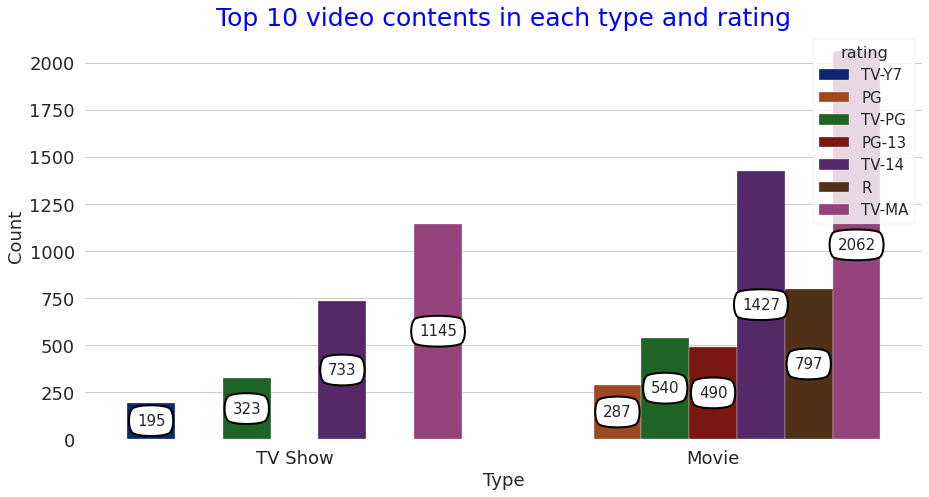

In [4]:
title = 'Top 10 video contents in each type and rating'
df_type_rating = df.groupby(['type','rating']).count().show_id.reset_index().sort_values(by = 'show_id').tail(10)
fig,ax = plt.subplots(figsize = (15,7.5))
plots = sns.barplot(data = df_type_rating, x='type',y = 'show_id', hue = 'rating', palette='dark')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
_ = plt.box(on=None)
_ = plt.title(title, fontsize = 25, color = 'blue')
_ = plt.xlabel('Type')
_ = plt.ylabel('Count')
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    <h3 style = "line-height:1.3;">Top 10 video contents by its type and rating is listed here. We can say that TV rating video contents are more prevalent in Netflix and R rated videos are all movie contents</h3>
</div>

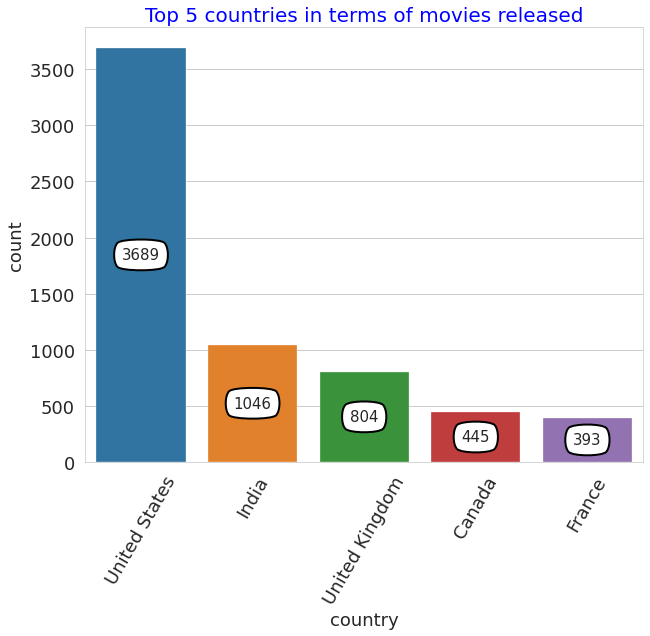

In [5]:
title = 'Top 5 countries in terms of movies released'
countries = {}
for country in df.country.dropna():
    for sub_country in str(country).split(', '):
        if sub_country not in countries:
            countries[sub_country] = 1
        else: countries[sub_country] += 1
df_countries = pd.DataFrame(list(countries.items()),columns = ['country','count']).sort_values(by = ['count'])
_ = plt.subplots(figsize = (10,8))
_ = plt.xticks(rotation = 60)
_ = plt.title(title, color='blue', fontsize=20)
plots = sns.barplot(data = df_countries.tail()[::-1],x= 'country', y='count')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    <h3 style = "line-height:1.3;">United states tops the productivity count with a huge margin nearly thrice the movie contents presented from the second best India.</h3>
</div>

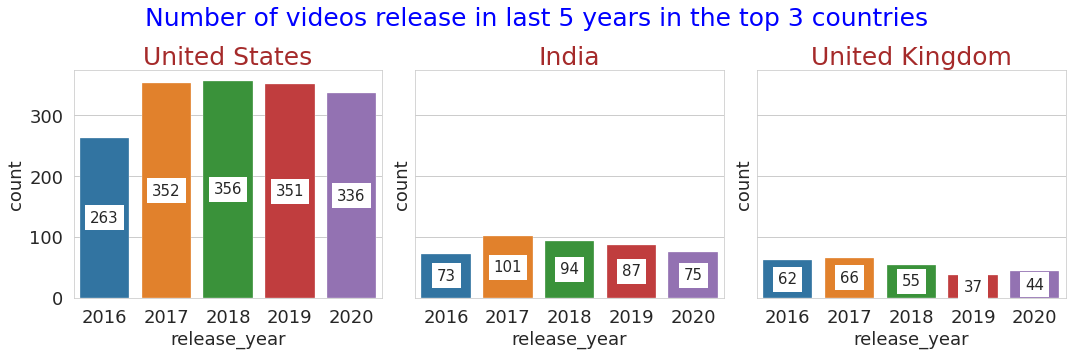

In [6]:
title = 'Number of videos release in last 5 years in the top 3 countries'
fig,ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5),sharey=True)
_ = fig.suptitle(title, fontsize = 25, color = 'blue')
i = 0
for country in df_countries.tail(3).country.values[::-1]:
    df_country = df.loc[df.country == country].loc[(df.release_year>2015) & (df.release_year<=2020)]
    plots = sns.countplot(data = df_country,x= 'release_year', ax = ax[i])
    _ = ax[i].set_title(country,color='brown', fontsize=25)
    for bar in plots.patches:
        _ = plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()/2), ha='center', va='center',
                       size=15, xytext=(0, 0),bbox=dict(fc="w", ec="white", lw=2),
                       textcoords='offset points')
    i += 1
fig.tight_layout()
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    <h3 style = "line-height:1.3;">The number of video uploads per year remains steady for past 4 years in all the top 3 countries except the considerable increase during the year 2017</h3>
</div>

## Number of programmes released by year

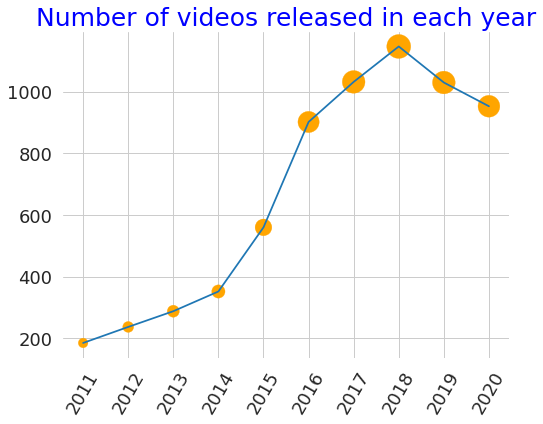

In [7]:
release = df['release_year'].value_counts()
release = release.sort_index(ascending=True)

title = 'Number of videos released in each year'
_ = plt.figure(figsize=(8,6))
_ = plt.plot(release[-11:-1])
_ = plt.scatter(release[-11:-1].index, release[-11:-1].values, s=0.5*release[-11:-1].values, c='orange');
_ = plt.box(on=None);
_ = plt.xticks(rotation = 60)
_ = plt.xticks(release[-11:-1].index);
_ = plt.title(title, color='blue', fontsize=25);
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    <h3 style = "line-height:1.3;">There is an increasing trend starting from the year 2011 and the trend starts to seetle with some dip in the movies counts post 2018.
It shows that most number of videos got released in 2018 comparatively higher than 2019 and 2020. </h3>
</div>

# Number of programmes by Rating

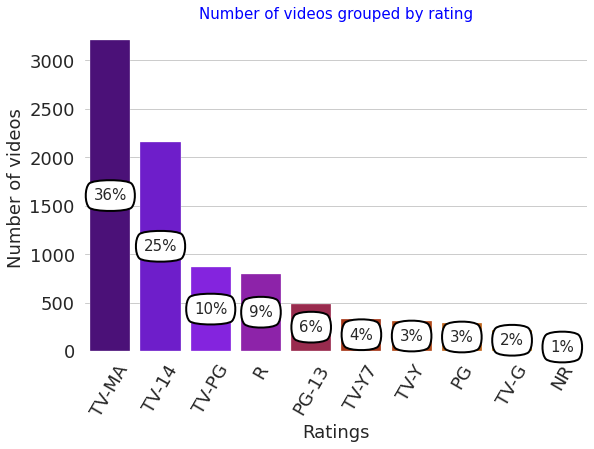

In [8]:
rating = df['rating'].value_counts()
#rating = rating.sort_values()

title = 'Number of videos grouped by rating'
_ = plt.figure(figsize=(9,6));
_ = plt.title(title, color='blue', fontsize=15)
plots = sns.barplot(y=rating.values[:10], x=rating.index[:10], palette='gnuplot',orient='v');
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height()/rating.sum()*100, '.0f')+'%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
_ = plt.box(on=None)
_ = plt.xlabel('Ratings')
_ = plt.xticks(rotation = 60)
_ = plt.ylabel('Number of videos')
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    <h3 style = "line-height:1.3;">More than 70% videos are TV rated with TV-MA amounting for the most.</h3>
</div>

# Most Popular Programmes by Country & Rating

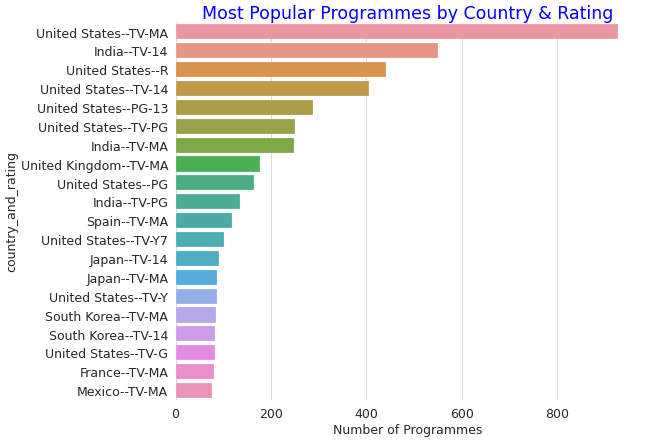

In [9]:
country_rating = df.groupby(['country', 'rating']).count().sort_values('show_id', ascending=False).reset_index()
country_rating['country_and_rating'] = country_rating[['country','rating']].apply(axis=1,func = lambda x : str(x.country)+'--'+str(x.rating))
country_rating.set_index(keys = 'country_and_rating', inplace = True)

title = 'Most Popular Programmes by Country & Rating'
_ = plt.figure(figsize=(12,10), dpi = 50)
plots = sns.barplot(y=country_rating.index[:20], x = country_rating['show_id'][:20]);
_ = plt.box(on=None)
_ = plt.title(title, fontsize=25, color='blue')
_ = plt.xlabel('Number of Programmes');
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    <h3 style = "line-height:1.3;">A Similar chart as we have seen before but with a additional dimension country is added to it. TV rated content accounts for the most as before. One interesting insight that we can grab is TV-MA is most popular than TV-14 in States and its a vice versa in India.</h3>
</div>

# Analysis on Movie Programmes

## Movies by Rating

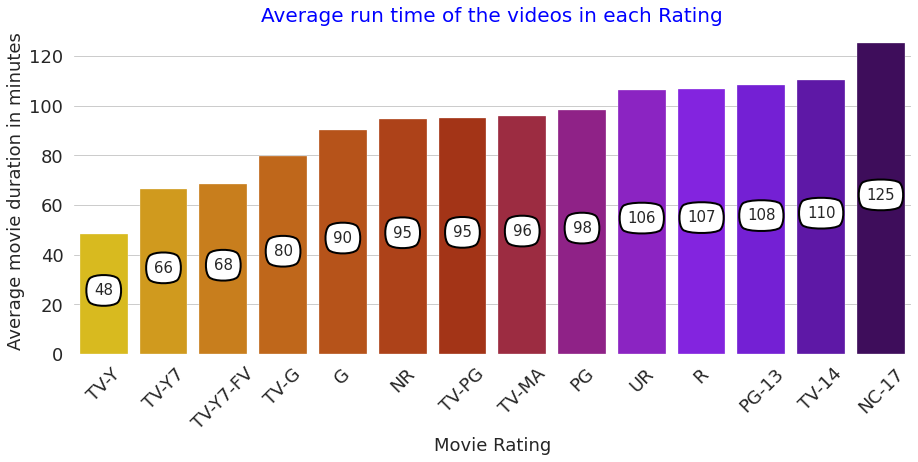

In [10]:
movie = df.copy()
movie = movie[movie['type'] == 'Movie']

movie['minute'] = movie.duration.apply(lambda x: 0 if str(x) == 'nan' else int(str(x).replace(' min','')))
#movie['minute'] = [int(re.findall('\d{1,3}', w)[0]) for w in movie.duration.ravel()]

movie.rating = movie.rating.apply(lambda x: pd.NA if str(x).endswith('min') else x)

duration_rating = movie.groupby(['rating']).mean().sort_values('minute')
title = 'Average run time of the videos in each Rating'
_ = plt.figure(figsize=(15,6))
plots = sns.barplot(x=duration_rating.index, y=duration_rating.minute.values, palette='gnuplot_r')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
_ = plt.box(on=None)
_ = plt.title(title, fontsize = 20, color = 'blue')
_ = plt.xlabel('Movie Rating')
_ = plt.xticks(rotation = 45)
_ = plt.ylabel('Average movie duration in minutes')
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

# Movie's Duration Trends

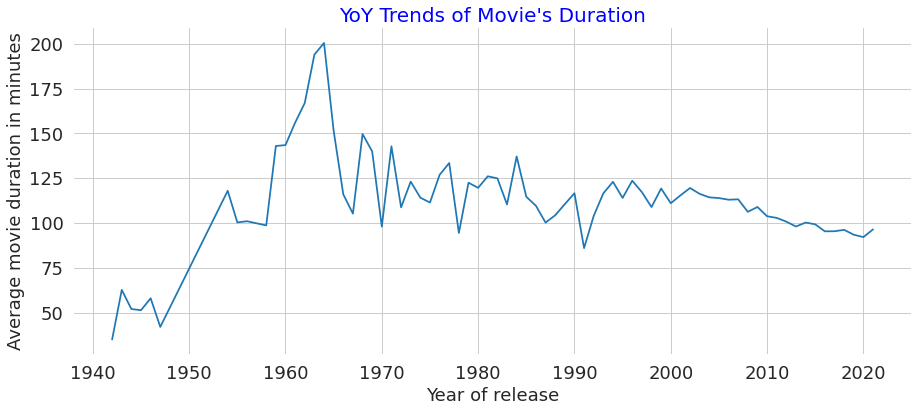

In [11]:
duration_year = movie.groupby(['release_year']).mean().sort_values('minute')
duration_year = duration_year.sort_index()

title = "YoY Trends of Movie's Duration"
_ = plt.figure(figsize=(15,6))
_ = sns.lineplot(x=duration_year.index, y=duration_year.minute.values)
_ = plt.box(on=None)
_ = plt.ylabel('Average movie duration in minutes');
_ = plt.xlabel('Year of release');
_ = plt.title(title, fontsize=20, color='blue');
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    <h3 style = "line-height:1.3;">The average movie's duration released during 1960 era was the longest </h3>
</div>

# Director's Productivity by Total Minutes of Movies Produced

Text(0.5, 0, 'Length of Total Movies Released in Minutes')

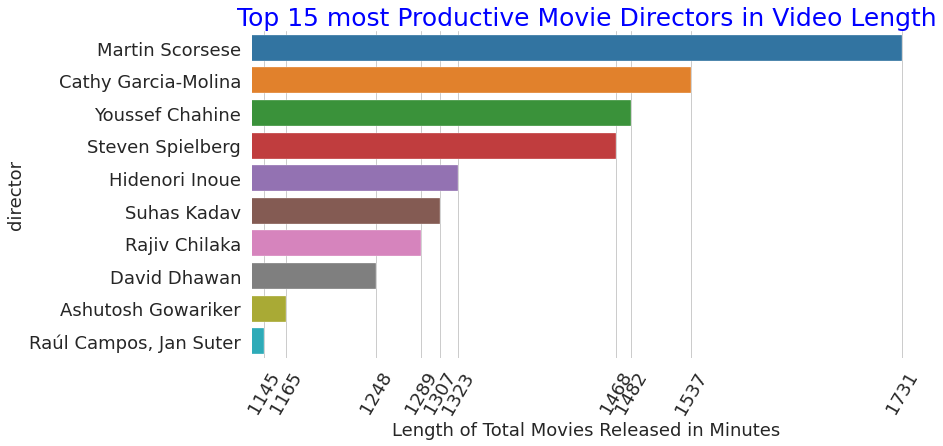

In [12]:
director_minute = movie.groupby('director').sum().sort_values('minute', ascending=False)
title = 'Top 15 most Productive Movie Directors in Video Length'
_ = plt.figure(figsize=(12,6))
_ = sns.barplot(y=director_minute.index[:10], x=director_minute.minute[:10]);
_ = plt.title(title, color='blue', fontsize=25)
_ = plt.xticks(director_minute.minute[:10],rotation = 60)
_ = plt.xlim(min(director_minute.minute[:10])/10*9.9,max(director_minute.minute[:10])/10*10.1)
_ = plt.box(on=None)
plt.xlabel('Length of Total Movies Released in Minutes');
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    <h3 style = "line-height:1.3;">Although Raul Campos produced more Movies, Martin Scorcece still outperform Raul in terms of the total duration of the movies </h3>
</div>

# The Most Productive Director by number of movies produced

Text(0.5, 0, 'Count of Total Movies Released')

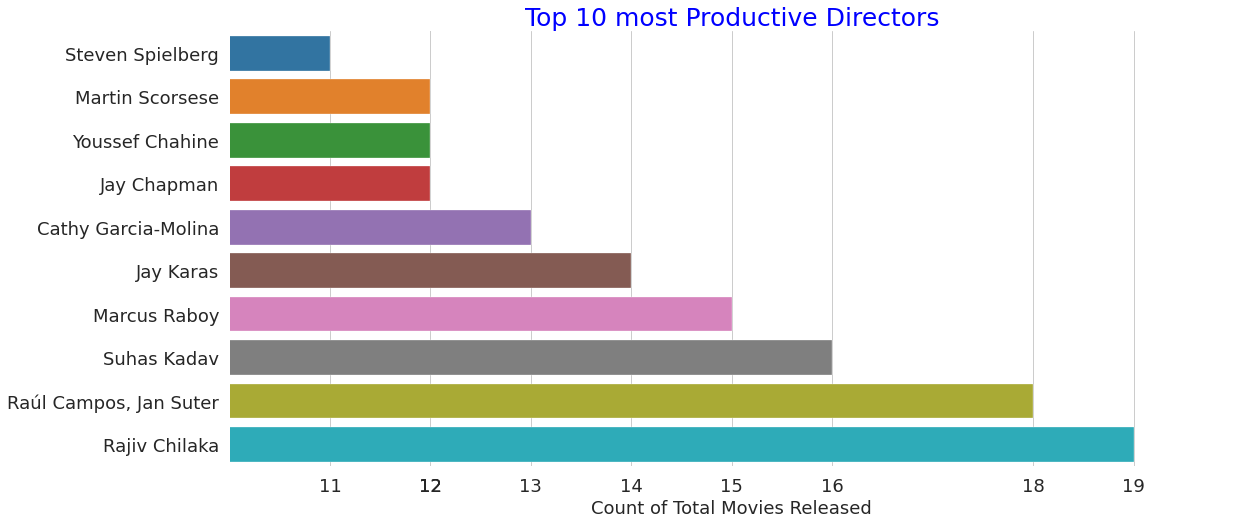

In [13]:
title = 'Top 10 most Productive Directors'
_ = plt.figure(figsize=(18,8))
_ = sns.barplot(y=movie.director.value_counts()[:10].sort_values().index, x=movie.director.value_counts()[:10].sort_values().values);
_ = plt.title(title, color='blue', fontsize=25)
_ = plt.box(on=None)
_ = plt.xticks(movie.director.value_counts()[:10].sort_values().values);
_ = plt.xlim(min(movie.director.value_counts()[:10])-1,max(movie.director.value_counts()[:10])+1)
plt.xlabel('Count of Total Movies Released');
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    <h3 style = "line-height:1.3;">Raul Campos and Jan Sutler have been credited as Directors in the record 18 videos 3 more than the second best. </h3>
</div>

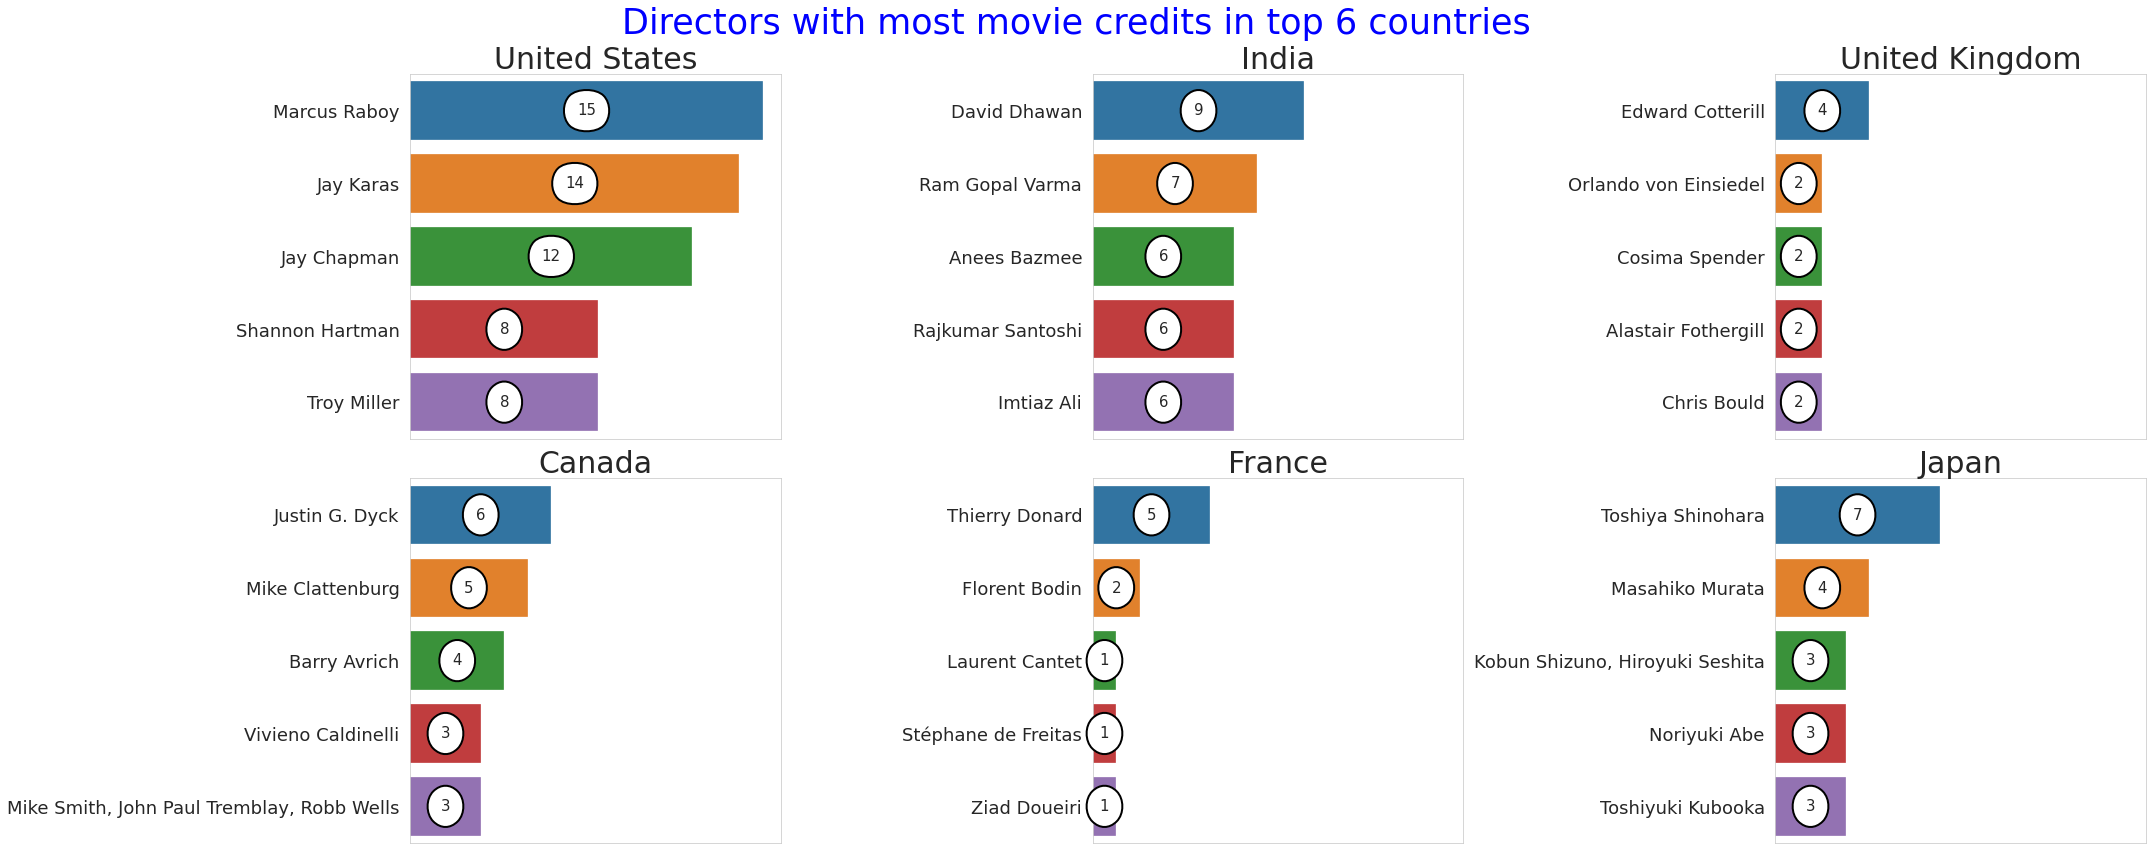

In [14]:
title = 'Directors with most movie credits in top 6 countries'
df_country = pd.DataFrame()
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (30,12), sharex = True)
_ = fig.suptitle(title, fontsize = 35, color = 'blue')
i,j = 0,0
n_countries = 6
n_directors = 5
for country in df_countries.tail(n_countries).country.values[::-1]:
    t_df = df[df.country == country].groupby(['director','country'], sort = False).count().sort_values('release_year')[-n_directors:][::-1].reset_index()
    plots = sns.barplot(data=t_df,y = 'director', x = 'release_year', ax =ax[i,j])
    for bar in plots.patches:
        _ = plots.annotate(format(bar.get_width(), '.0f'), 
               (bar.get_width()/2, 
                bar.get_y() + bar.get_height() / 2), ha='center', va='center',
               size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=1", fc="w", ec="black", lw=2),
               textcoords='offset points')
    _ = ax[i,j].set_xticks([])
    _ = ax[i,j].set_title(country,fontsize=30)
    _ = ax[i,j].set_xlabel('')
    _ = ax[i,j].set_ylabel('')
    df_country = df_country.append(t_df)
    j += 1
    if j> n_countries/2-1:
        j = 0
        i = 1
fig.tight_layout()
plt.savefig(title+'.'+img_fmt, format = img_fmt)

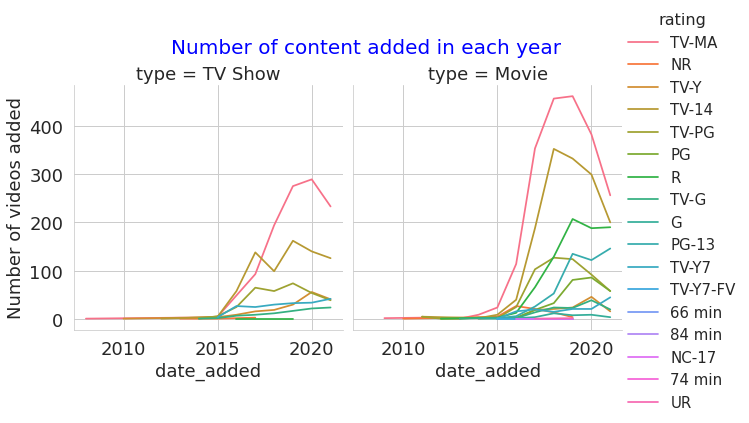

In [15]:
df_data_added = df[df.date_added >'2008-01-01'].groupby([df.date_added.dt.year,df.type,df.rating]).count().show_id.reset_index()
title = 'Number of content added in each year'
g = sns.relplot(data = df_data_added, x = 'date_added', y = 'show_id', col = 'type', hue ='rating',kind = 'line', markers = True,aspect = 0.9, height = 5)
_ = g.axes[0,0].set_ylabel('Number of videos added')
_ = g.fig.suptitle(title, color = 'blue',fontsize = 20)
_ = g.fig.subplots_adjust(top=0.85)
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    <h3 style = "line-height:1.3;">TV-MA and TV-14 accounts for the most number videos over the span of last 5 years.</h3>
</div>

## Converting the multi value columns from the type String to List

In [16]:
#mapping the multiple value cells into list type
df['directors'] = df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
df['genres'] = df['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
df['actors'] = df['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
df['countries'] = df['country'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
df['all_features'] = df['directors'] + df['genres'] + df['actors'] + df['countries']
df['all_features'] = df['all_features'].apply(lambda x: " ".join(x))

# Identifying similar content by matching text-based features

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
def text_cleanser(text):
    stemmer = WordNetLemmatizer()
    text = ''.join([char for char in text if (char.isalpha() or char.isspace()) and char !="'"])
    text = [word.lower() for word in text.split() if word.lower() not in stopwords.words('english')]
    return [stemmer.lemmatize(word) for word in text]
sample_text = "Hello! This is me. I need to verify whether this sentence is working correctly."
print(text_cleanser(sample_text))

['hello', 'need', 'verify', 'whether', 'sentence', 'working', 'correctly']


In [19]:
df_desc = df[['show_id','description']].set_index('show_id')
df_desc['trunc_desc'] = df_desc['description'].apply(lambda x : text_cleanser(x))

In [20]:
vocabulary = {}
for words in df_desc.trunc_desc:
    for word in words:
        if word in vocabulary:
            vocabulary[word] = vocabulary[word] + 1
        else:
            vocabulary[word] = 1
df_voc = pd.DataFrame(list(vocabulary.items()),columns = ['text','count'])

(-0.5, 761.5, 609.5, -0.5)

Text(0.5, 1.0, 'Top key terms in the movie description')

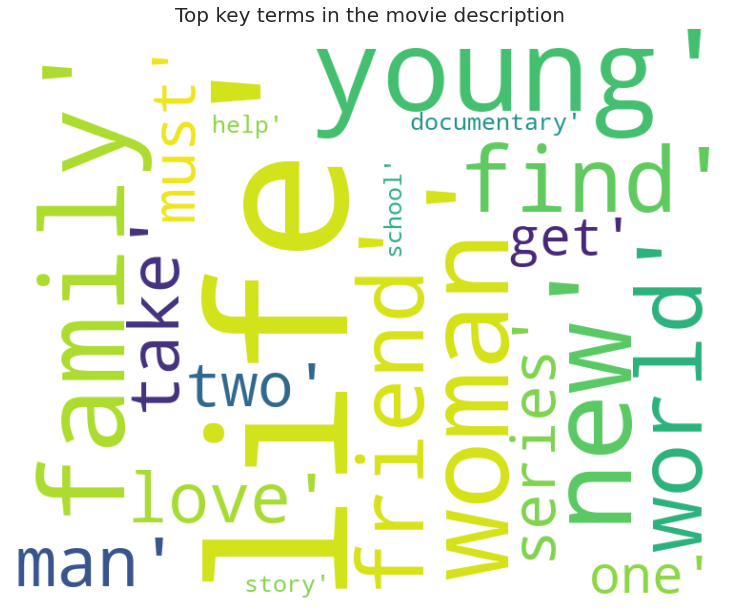

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = df_voc.sort_values(ascending=False, by ='count')[:20].text.values
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
mask = np.array(Image.open('../input/awesome-wordcloud-masks/Awards/trophy.png'))
wordcloud = WordCloud(max_words=1000000,background_color="white",mask=mask).generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title('Top key terms in the movie description')
plt.show()

# Clustering :-

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
bow_transformer = CountVectorizer(analyzer = text_cleanser).fit(df_desc['description'])
desc_bow = bow_transformer.transform(df_desc['description'])
print('Shape of the generated matrix : ',desc_bow.shape)
sparsity = desc_bow.nnz/(desc_bow.shape[0]*desc_bow.shape[1])*100.0
print('Sparsity of the generated matrix',round(sparsity,4))

Shape of the generated matrix :  (8807, 18085)
Sparsity of the generated matrix 0.079


In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,directors,genres,actors,countries,all_features
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Kirsten_Johnson],[Documentaries],[],[United_States],Kirsten_Johnson Documentaries United_States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[],"[International_TV_Shows, TV_Dramas, TV_Mysteries]","[Ama_Qamata, Khosi_Ngema, Gail_Mabalane, Thaba...",[South_Africa],International_TV_Shows TV_Dramas TV_Mysteries ...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,[Julien_Leclercq],"[Crime_TV_Shows, International_TV_Shows, TV_Ac...","[Sami_Bouajila, Tracy_Gotoas, Samuel_Jouy, Nab...",[],Julien_Leclercq Crime_TV_Shows International_T...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",[],"[Docuseries, Reality_TV]",[],[],Docuseries Reality_TV
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,[],"[International_TV_Shows, Romantic_TV_Shows, TV...","[Mayur_More, Jitendra_Kumar, Ranjan_Raj, Alam_...",[India],International_TV_Shows Romantic_TV_Shows TV_Co...


In [24]:
# Finding TF and IDF metrics
vector = TfidfVectorizer(max_df=1.0, min_df=1,strip_accents = 'ascii', stop_words='english',lowercase=True,use_idf=True,norm=u'l2',smooth_idf=True)
tfidf = vector.fit_transform(df.all_features)

In [25]:
# Cluster the description data using MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.pairwise import linear_kernel
#setting the no. of resulting clusters for kmeans
k = 400
kmeans = MiniBatchKMeans(n_clusters = k, init = 'k-means++')
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names_out()
request_transform = vector.transform(df['all_features'])
# new column cluster based on the description
df['cluster'] = kmeans.predict(request_transform) 

MiniBatchKMeans(n_clusters=400)

# Recommendation System :-
<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    <h4 style = "line-height:1.3;">Collaborative filtering is used here to build the recommendation system. The System will be primarily based on the user opinions</h4>
</div>

In [26]:
def find_similar_movies(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]  

In [27]:
for ind in find_similar_movies(tfidf,0,5):
    print(df.loc[ind].title)

The Minimalists: Less Is Now
Crip Camp: A Disability Revolution
Murder to Mercy: The Cyntoia Brown Story
Free to Play
Virunga: Gorillas in Peril


# Recommendation System :-
<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    <h2 style = "line-height:1.3;">Graph preparation</h2>
    <ul>
    <li>Insert all the notable parameters like castings,genre and directors as nodes in the graph.</li>
    <li>use <i>find_similar_movies()</i> method to fetch the n related movies for the given node </li>
    <li>Connect the all the related movie nodes with the selected movie with an edge names '<i>SIMILAR</i>'</li>
</ul>    
</div>

In [28]:
G = nx.Graph(label="MOVIE")
start_time = time.time()
for i, rowi in df.iterrows():
    G.add_node(rowi['title'],key=rowi['show_id'],label="MOVIE",mtype=rowi['type'],rating=rowi['rating'])
    for element in rowi['actors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="ACTED_IN")
    for element in rowi['genres']:
        G.add_node(element,label="GENRE")
        G.add_edge(rowi['title'], element, label="GENRE_IN")
    for element in rowi['directors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="DIRECTED")
    for element in rowi['countries']:
        G.add_node(element,label="COU")
        G.add_edge(rowi['title'], element, label="COU_IN")
    
    indices = find_similar_movies(tfidf, i, top_n = 3)
    snode="Sim("+rowi['title'][:15].strip()+")"        
    G.add_node(snode,label="SIMILAR")
    G.add_edge(rowi['title'], snode, label="SIMILARITY")
    for element in indices:
        G.add_edge(snode, df['title'].loc[element], label="SIMILARITY")
print(" finish -- {} seconds --".format(time.time() - start_time))    

 finish -- 62.57474756240845 seconds --


In [29]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):        
                sub_graph.add(e)
    return list(sub_graph)
def draw_sub_graph(sub_graph, title = ""):
    subgraph = G.subgraph(sub_graph)
    colors=[]
    sizes = []
    std_size = 500
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="MOVIE":
            colors.append('#b3042c')
            sizes.append(std_size*5)
        elif G.nodes[e]['label']=="PERSON":
            colors.append('#047d59')
            sizes.append(std_size*2.5)
        elif G.nodes[e]['label']=="GENRE":
            colors.append('#3a018a')
            sizes.append(std_size)
        elif G.nodes[e]['label']=="COU":
            colors.append('#bd3102')
            sizes.append(std_size*0.9)
        elif G.nodes[e]['label']=="SIMILAR":
            colors.append('#b87906')
            sizes.append(std_size)
        elif G.nodes[e]['label']=="CLUSTER":
            colors.append('#cdf7e9')
            sizes.append(std_size*0.9)
    fig, ax = plt.subplots(figsize = (18,18))
    nx.draw(subgraph, with_labels=True, alpha = 0.8, node_shape = 'o' ,node_size = sizes,cmap = 'Accent', edge_color = 'white',font_color = 'white',font_weight='bold',node_color=colors)    
    #plt.title('Recommendations after watching The video '+title+' :-')
    ax.set_title('Recommendations after watching The video '+title+' :-', color='white', size = 30)
    ax.axis('off')
    fig.set_facecolor('#44495c')
    plt.tight_layout()
    plt.show()

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.3em;">
    <h2 style = "line-height:1.3;">Method get_recommendation:</h2>
    <ul>
    <li>Fetch all the neighbor nodes for the given movie.</li>
    <li>Collect all the related movies in a dictionary</li>
    <li>Order the all related movies based on its weights(degrees - number neighbours that a particular node has)</li>
    <li>Top N related movies will be recommended for a given movie</li>
</ul>
</div>


In [30]:
def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):           
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="MOVIE":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    movies=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        movies.append(key) 
        weight.append(w)
    
    result = pd.Series(data=np.array(weight),index=movies)
    result.sort_values(inplace=True,ascending=False)        
    return result

## Recommendation after watching the movie 'Dark'

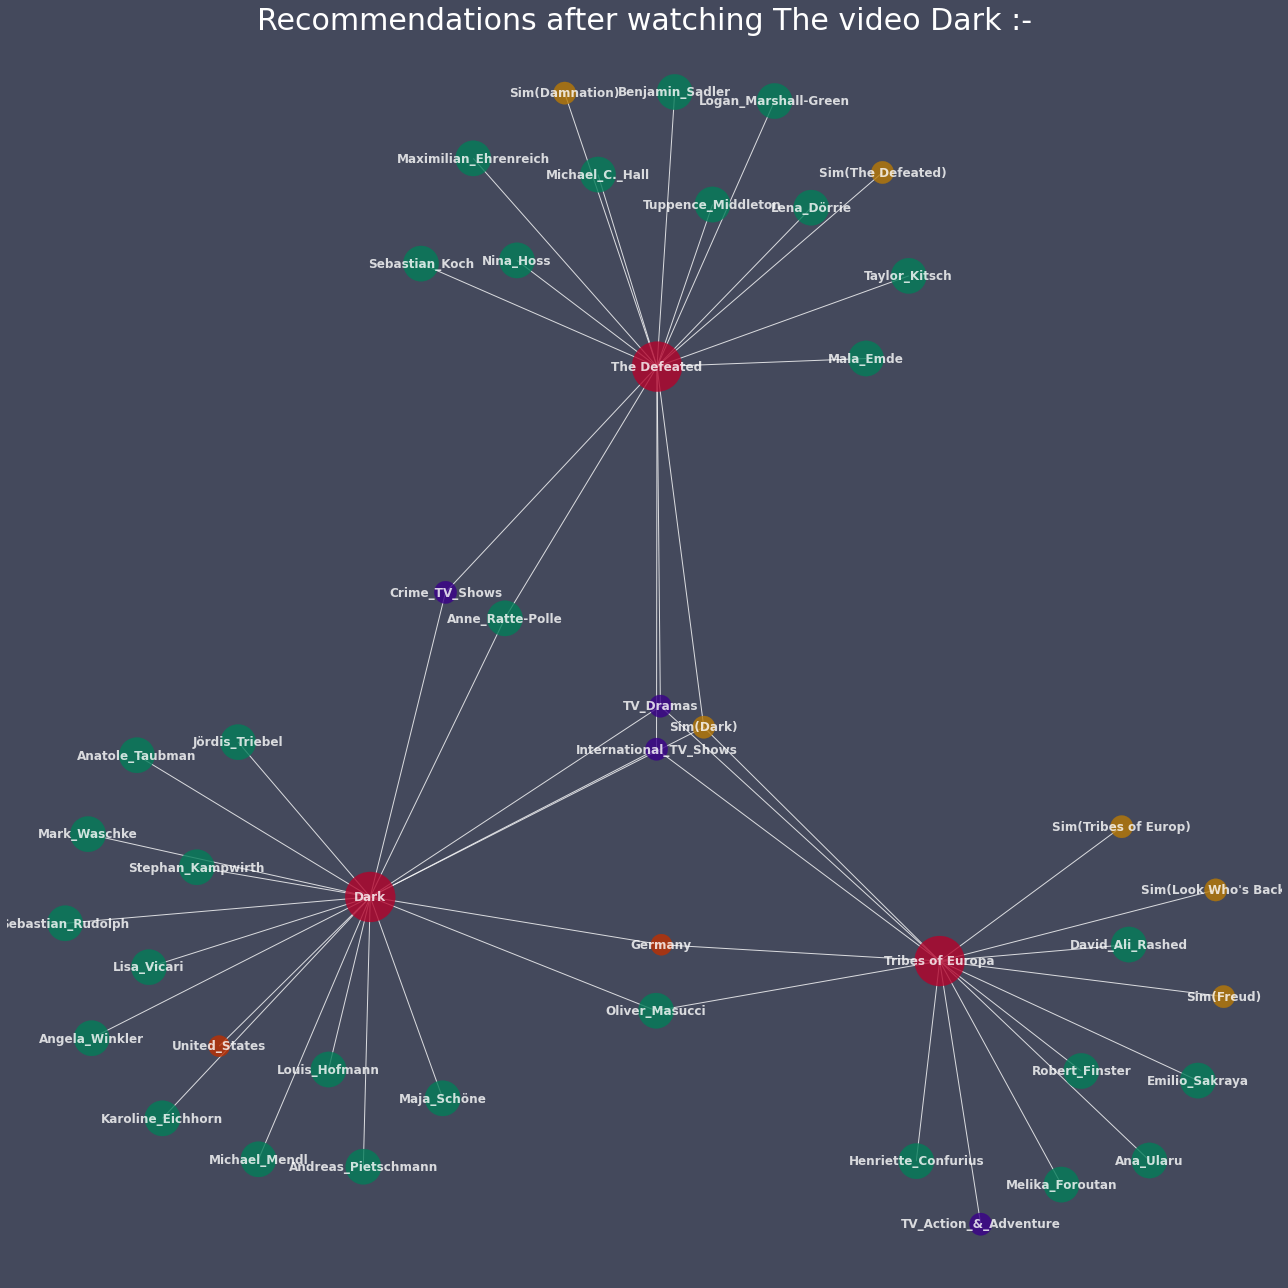

In [31]:
Movie="Dark"
recommendation = get_recommendation(Movie)
rel_graph = get_all_adj_nodes([Movie]+list(recommendation.index[:2]))
draw_sub_graph(rel_graph,Movie)

## Recommendation after watching the movie '1922'

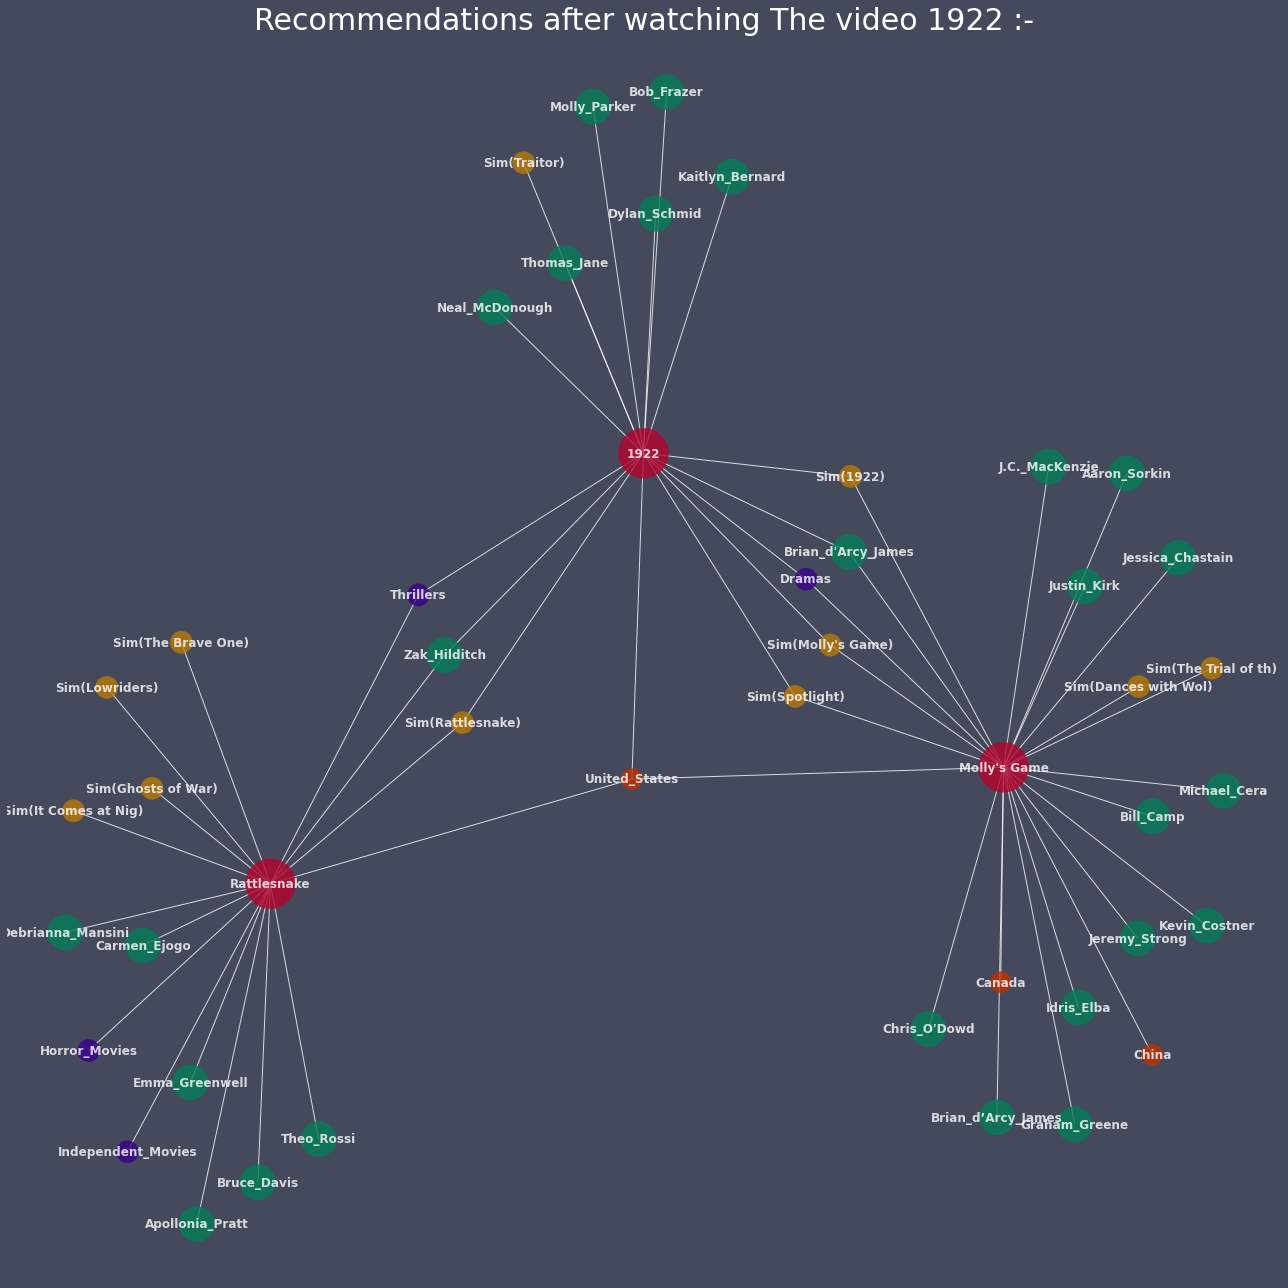

In [32]:
Movie="1922"
recommendation = get_recommendation(Movie)
rel_graph = get_all_adj_nodes([Movie]+list(recommendation.index[:2]))
draw_sub_graph(rel_graph,Movie)